                         **MIND YOUR P'S AND Q'S**
                                            

Decrypt my super sick RSA:

c:421345306292040663864066688931456845278496274597031632020995583473619804626233684

n:631371953793368771804570727896887140714495090919073481680274581226742748040342637

e: 65537

Given that the length of $n$ is manageable it's useful to break it into factors. Usando Prime Factors Decomposition Dcode Web for the factors we get:

p: 1461849912200000206276283741896701133693

q : 431899300006243611356963607089521499045809
![table.png](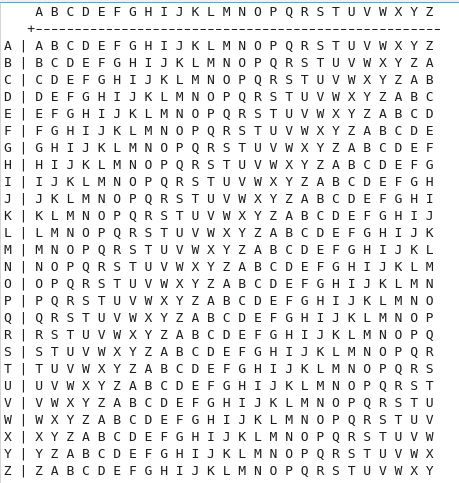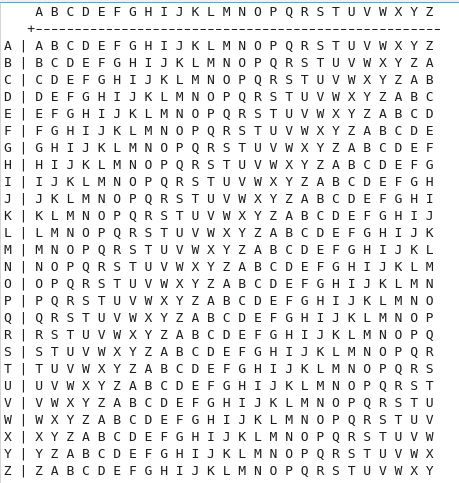)
Next we detail in a terminal the order of calculations using first the totient eulers expression and then solve for d in order to later get the message m and transform it to bytes, all using python and python libraries.






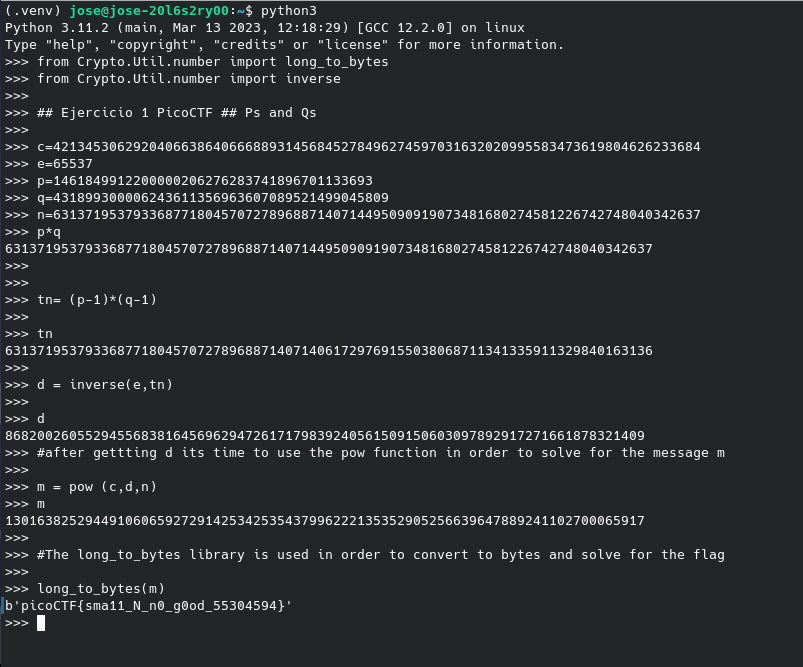




                                  **Numbers**

Given the provided image by picoCTF
 we have the next numbers:

 16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }  

Following an image of the procedure to solve for ascii:

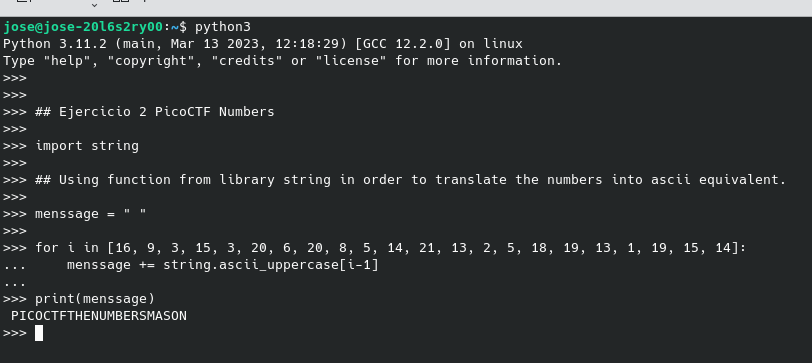



















                              No Padding, No Problem

Given that there is no Padding, from RSA we know that the principle of homomorfic encryption happens, this means:

\begin{align}
encrypt(m1) * encrypt(m2) = encrypt(m1*m2)
\end{align}

Then, we can use this idea to solve for the plaintext desired.Connecting to mercury.picoctf.net 10333 via terminal we got:

n: 121109761116878564478036614082797857298345846061372820467879440738808922034563212078989563234490116111042840630646656842528109740623262050983466997132380878472415157514121173344698649281648938763010101590914097021350466726651831015060993448163859056056805549477784316507608303864720542890711726940583245777457
e: 65537

ciphertext: 98679612868158076465649560419255246813912465821373199529195930098619746696488586242439048022766716651545373102136322332370827502246368745433448215815970767177895710007792624023779478723144448874639261086229916294138930283267747933724636163695357845933907373245649584616337606495603701364840500667280907328657

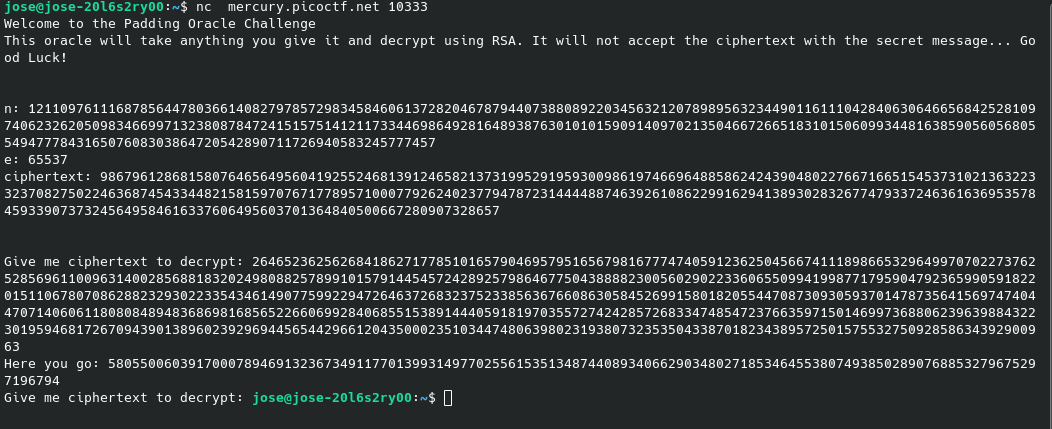



Next, and image detailing the process in terminal as follows:
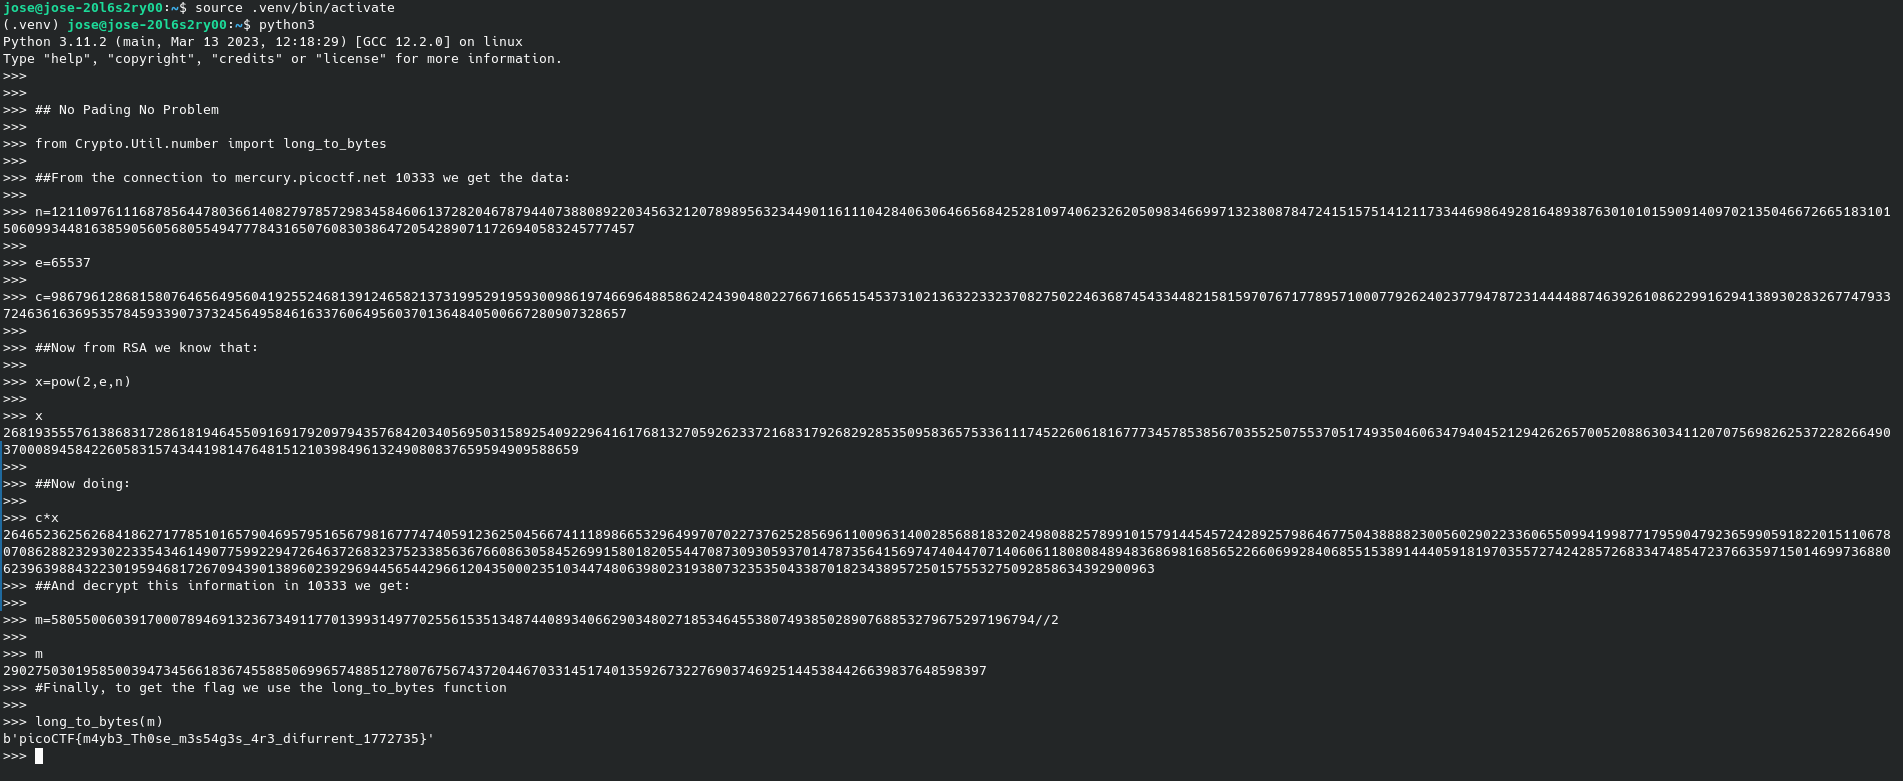














                          Pixelated

The code for solving this problem goes as follows:

Importing from python imaging library Pillow the image library to load the scrambled png's provided by picoCTF, to then fixed them in RGBA format in order to prepare them for processing. Nex in the for we can see the stacking of the images in the range of 256 pixels for every color category generating a new pixelated image in RGBA format containing the flag.  


In [ ]:
from PIL import Image

first_image = Image.open("scrambled1.png")
first_image_pixels = first_image.load()

second_image = Image.open("scrambled2.png")
second_image_pixels = second_image.load()

result_image = Image.new("RGBA", first_image.size)
result_pixels = result_image.load()

for row in range(first_image.size[1]):
    for column in range(first_image.size[0]):

        new_pixel = (
            (first_image_pixels[row, column][0] + second_image_pixels[row, column][0]) % 256,
            (first_image_pixels[row, column][1] + second_image_pixels[row, column][1]) % 256,
            (first_image_pixels[row, column][2] + second_image_pixels[row, column][2]) % 256
        )
        result_pixels[row, column] = new_pixel

result_image.save("combined_flag.png")

                          Easy1 -Vigenere Cipher

Regarding the table generated by picoCFT:

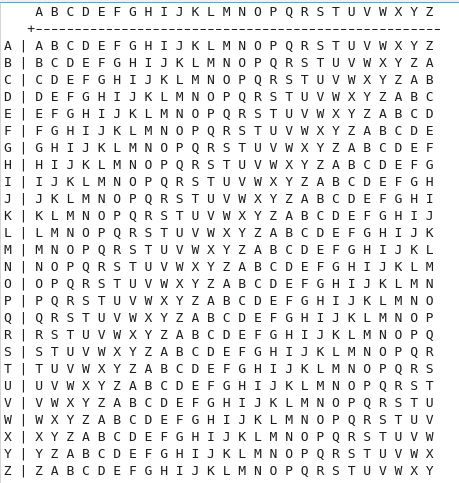


Cipher: UFJKXQZQUNB

Key: SOLVECRYPTO

In this case we are going to brute force the solution looking in the table for the intersection for between cipher and key. The process would result as follows.

Plaintext:

Cipher >>>   U      F     J     K     X     Q     Z     Q     U    N    B
                M     T     U     F     B     S    Q      O    J    G     P
Key    >>>   S      O     L     V     E     C     R     Y     P    T    O

Flag>> picoCTF{MTUFBSQOJGP}
                        

Referencias:

Prime Factors Decomposition on dCode.fr [online website], retrieved on 2024-05-16, https://www.dcode.fr/prime-factors-decomposition


Visual cryptography. (03 de abril de 2024). Wikipedia, La enciclopedia libre. 20:58, 15 de mayo de 2024 desde https://en.wikipedia.org/wiki/Visual_cryptography

hackadvisermx (24 de octubre de 2022). picoCTF 2021 writeup [44] - Cryptography - Mind your Ps and Qs. YouTube. https://www.youtube.com/watch?v=pwGSp_4YHTg

hackadvisermx (24 de octubre de 2022). picoCTF 2021 writeup [45] - Cryptography - No Padding, No Problem. YouTube. https://www.youtube.com/watch?v=UN9M9Cby1zc

Jeffrey A. Clark and contributors (s.f) Pillow. https://pillow.readthedocs.io/en/stable/


